<a href="https://colab.research.google.com/github/abdullahzahid10/EEEM066/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import the KNNimputer class
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [2]:
# create dataset for season ranking
dict = {'Friends':[80, 44, np.nan, 50,29],
		'HIMYM': [30, np.nan, 85, 70,54],
		'GOT':[7,10,25,74,49],
	'Suits' : [14,0,5,9,20],
    'BB':[27,29,88,49,np.nan]}

In [3]:
# creating a data frame from the list
Before_imputation = pd.DataFrame(dict)
#print dataset before imputation
print("Data Before performing imputation\n",Before_imputation)

Data Before performing imputation
    Friends  HIMYM  GOT  Suits    BB
0     80.0   30.0    7     14  27.0
1     44.0    NaN   10      0  29.0
2      NaN   85.0   25      5  88.0
3     50.0   70.0   74      9  49.0
4     29.0   54.0   49     20   NaN


In [4]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
After_imputation = imputer.fit_transform(Before_imputation)
# print dataset after performing the operation
print("\n\nAfter performing mean imputation\n",After_imputation)



After performing mean imputation
 [[80.   30.    7.   14.   27.  ]
 [44.   59.75 10.    0.   29.  ]
 [50.75 85.   25.    5.   88.  ]
 [50.   70.   74.    9.   49.  ]
 [29.   54.   49.   20.   48.25]]


In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
After_imputation = imputer.fit_transform(Before_imputation)
# print dataset after performing the operation
print("\n\nAfter performing median imputation\n",After_imputation)



After performing median imputation
 [[80. 30.  7. 14. 27.]
 [44. 62. 10.  0. 29.]
 [47. 85. 25.  5. 88.]
 [50. 70. 74.  9. 49.]
 [29. 54. 49. 20. 39.]]


In [6]:
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(Before_imputation)
# print dataset after performing the operation
print("\n\nAfter performing KNN imputation\n",After_imputation)



After performing KNN imputation
 [[80.  30.   7.  14.  27. ]
 [44.  42.  10.   0.  29. ]
 [39.5 85.  25.   5.  88. ]
 [50.  70.  74.   9.  49. ]
 [29.  54.  49.  20.  68.5]]


In [7]:
from sklearn.feature_selection import mutual_info_classif
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# naming the features, fields or columns AND the response, dependent variable
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
          'Insulin', 'BMI', 'DiabetesPedigree', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
print(dataframe)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigree  age  class  
0               0.627   50      1  
1               0.351   31      0  
2  

In [8]:
# Converting the DataFrame object to a Numpy ndarray
# to achieve faster computation
array = dataframe.values

# Segregating the data into separate variables
# Features and the labels are separated

# Features, col 0 to 7
X = array[:,0:8]
print(X)
# Class, col 8
Y = array[:,8]

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


<Axes: >

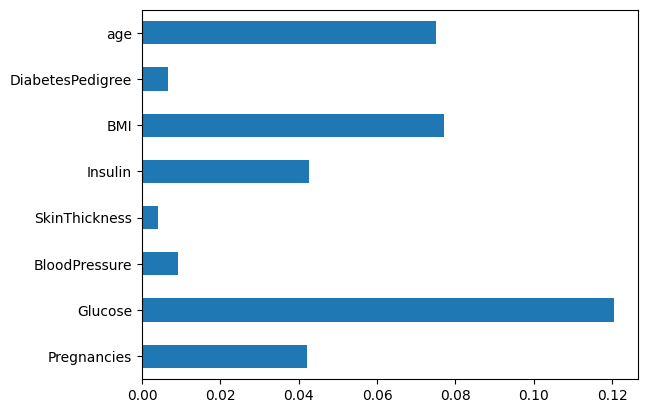

In [9]:
importance=mutual_info_classif(X,Y,random_state=20)
feat_importance=pd.Series(importance,dataframe.columns[0:len(dataframe.columns)-1])
feat_importance.plot(kind='barh')

<Axes: >

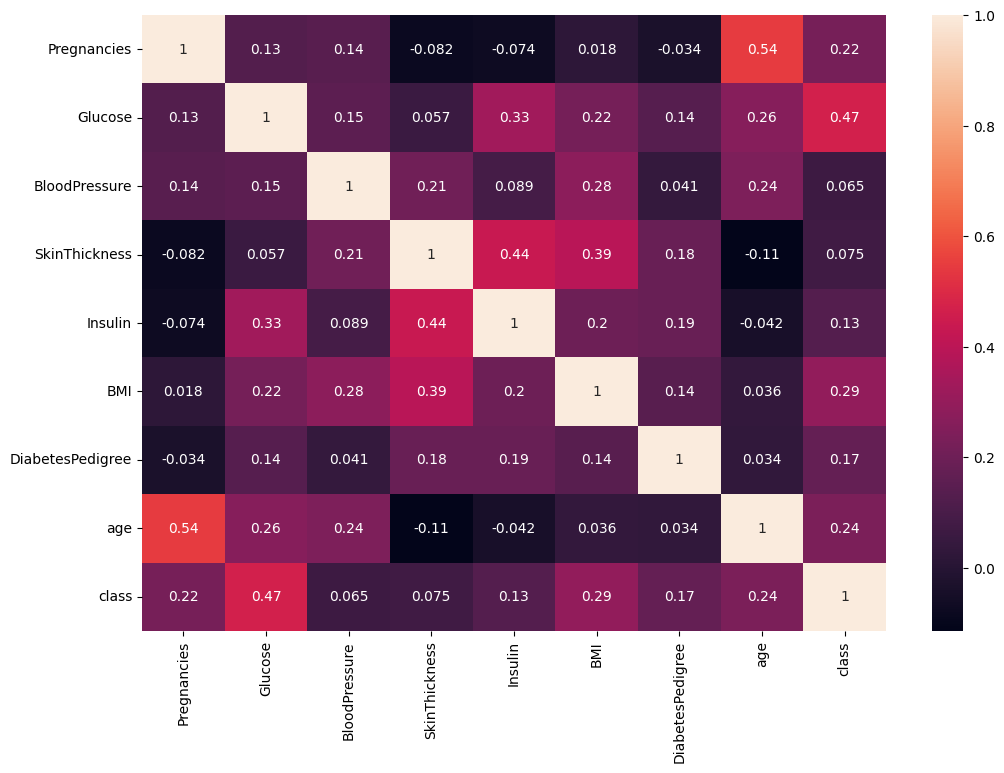

In [10]:
from sklearn.feature_selection import mutual_info_classif
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# naming the features, fields or columns AND the response, dependent variable
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
          'Insulin', 'BMI', 'DiabetesPedigree', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
corr=dataframe.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

In [15]:
# Pre-Modeling Tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Modeling
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
## Read the csv file
df = pd.read_csv("Week_5_cancer_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
## details of dataset
df= df.drop(['id'],axis=1)
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

In [17]:
## Splitting the dataset in 80:20 partitiom
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                    test_size=0.2, random_state=42)

In [18]:
## Apply z-score normalization to data
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)


In [19]:
# Support Vector classifier
svc = SVC()
## train our SVM model with our “training” dataset.
svc.fit(X_train,y_train)

SVC()

In [20]:
y_predict = svc.predict(X_test)


0.9824561403508771


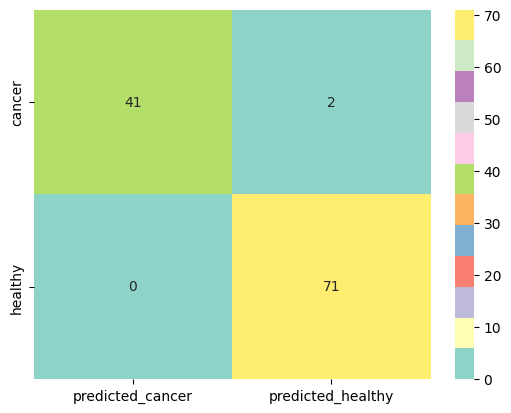

In [21]:
cm = np.array(confusion_matrix(y_test, y_predict))
confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])
sns.heatmap(confusion_mat,annot=True,fmt='g',cmap='Set3')
print(accuracy_score(y_test, y_predict))